In [1]:
import numpy as np
import pandas as pd
import datetime
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
#read data
#make the path
binance_1h = os.path.join('historical_data' , 'binance' , '1H.csv')
#read csv
source = pd.read_csv(binance_1h)
df = source.copy()
#set date and index
df['Date'] = pd.to_datetime(source['Date'], format='%Y-%m-%d %H:%M:%S')
df.set_index('Date', inplace=True)

In [3]:
df

,Open,High,Low,Close,Volume,Numtr
Date,,,,,,
2017-09-05 00:00:00,4100.11,4116.08,3901.02,3999.99,74.037776,514.0
2017-09-05 01:00:00,3956.58,4121.33,3620.00,3620.00,99.245286,567.0
2017-09-05 02:00:00,3659.50,4054.15,3603.00,4054.11,53.837624,623.0
2017-09-05 03:00:00,4054.11,4071.83,3943.11,3988.04,59.367200,644.0
2017-09-05 04:00:00,3996.24,4070.38,3943.10,4038.01,38.124178,333.0
...,...,...,...,...,...,...
2021-06-01 05:00:00,36748.02,37350.00,36710.40,37266.55,2603.445266,55850.0
2021-06-01 06:00:00,37264.66,37443.72,36710.19,36915.32,3002.411865,83909.0
2021-06-01 07:00:00,36917.60,37171.09,36638.71,36831.58,2722.383175,88793.0


In [4]:
## function sma on close
def add_sma_to_dataframe (df):
    #####sma9
    df['sma9'] = df.Close.rolling(window=9).mean()
    #####sma20
    df['sma20'] = df.Close.rolling(window=20).mean()
    #####sma50
    df['sma50'] = df.Close.rolling(window=50).mean()
    #####sma200
    df['sma200'] = df.Close.rolling(window=200).mean()

    return(df)

In [5]:
## add sma9 sma20 sma50 and sma200 to data frame
df = add_sma_to_dataframe(df)
df

,Open,High,Low,Close,Volume,Numtr,sma9,sma20,sma50,sma200
Date,,,,,,,,,,
2017-09-05 00:00:00,4100.11,4116.08,3901.02,3999.99,74.037776,514.0,NaN,NaN,NaN,NaN
2017-09-05 01:00:00,3956.58,4121.33,3620.00,3620.00,99.245286,567.0,NaN,NaN,NaN,NaN
2017-09-05 02:00:00,3659.50,4054.15,3603.00,4054.11,53.837624,623.0,NaN,NaN,NaN,NaN
2017-09-05 03:00:00,4054.11,4071.83,3943.11,3988.04,59.367200,644.0,NaN,NaN,NaN,NaN
2017-09-05 04:00:00,3996.24,4070.38,3943.10,4038.01,38.124178,333.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-06-01 05:00:00,36748.02,37350.00,36710.40,37266.55,2603.445266,55850.0,37070.010000,36935.7150,36089.5568,37026.69610
2021-06-01 06:00:00,37264.66,37443.72,36710.19,36915.32,3002.411865,83909.0,37068.095556,36937.3335,36132.8284,37042.10885
2021-06-01 07:00:00,36917.60,37171.09,36638.71,36831.58,2722.383175,88793.0,37062.801111,36937.0895,36162.9478,37052.99050


In [6]:
start_date = '2020-03-01'
df = df.loc[start_date:]
df

,Open,High,Low,Close,Volume,Numtr,sma9,sma20,sma50,sma200
Date,,,,,,,,,,
2020-03-01 00:00:00,8523.61,8613.57,8511.11,8547.25,1952.740513,22876.0,8620.686667,8656.9995,8684.2072,9250.74405
2020-03-01 01:00:00,8546.65,8649.00,8514.06,8639.28,1901.273280,24731.0,8624.574444,8650.5635,8680.5286,9245.39150
2020-03-01 02:00:00,8640.23,8675.00,8617.73,8630.86,1271.182357,16257.0,8622.258889,8646.6675,8676.0248,9240.04025
2020-03-01 03:00:00,8631.94,8665.86,8616.45,8620.36,933.691823,13964.0,8617.440000,8640.3950,8670.5600,9234.73285
2020-03-01 04:00:00,8620.17,8634.73,8560.45,8580.73,1387.244226,15680.0,8607.364444,8631.9800,8664.8060,9229.15945
...,...,...,...,...,...,...,...,...,...,...
2021-06-01 05:00:00,36748.02,37350.00,36710.40,37266.55,2603.445266,55850.0,37070.010000,36935.7150,36089.5568,37026.69610
2021-06-01 06:00:00,37264.66,37443.72,36710.19,36915.32,3002.411865,83909.0,37068.095556,36937.3335,36132.8284,37042.10885
2021-06-01 07:00:00,36917.60,37171.09,36638.71,36831.58,2722.383175,88793.0,37062.801111,36937.0895,36162.9478,37052.99050


In [7]:
df_feature = df.copy()
df_feature['diff_sma9'] = (df.Close - df.sma9)/(df.Open)
df_feature['diff_sma20'] = (df.Close - df.sma20)/(df.Open)
df_feature['diff_sma20_9'] = (df.sma20 - df.sma9)/(df.sma20)
df_feature

,Open,High,Low,Close,Volume,Numtr,sma9,sma20,sma50,sma200,diff_sma9,diff_sma20,diff_sma20_9
Date,,,,,,,,,,,,,
2020-03-01 00:00:00,8523.61,8613.57,8511.11,8547.25,1952.740513,22876.0,8620.686667,8656.9995,8684.2072,9250.74405,-0.008616,-0.012876,0.004195
2020-03-01 01:00:00,8546.65,8649.00,8514.06,8639.28,1901.273280,24731.0,8624.574444,8650.5635,8680.5286,9245.39150,0.001721,-0.001320,0.003004
2020-03-01 02:00:00,8640.23,8675.00,8617.73,8630.86,1271.182357,16257.0,8622.258889,8646.6675,8676.0248,9240.04025,0.000995,-0.001830,0.002823
2020-03-01 03:00:00,8631.94,8665.86,8616.45,8620.36,933.691823,13964.0,8617.440000,8640.3950,8670.5600,9234.73285,0.000338,-0.002321,0.002657
2020-03-01 04:00:00,8620.17,8634.73,8560.45,8580.73,1387.244226,15680.0,8607.364444,8631.9800,8664.8060,9229.15945,-0.003090,-0.005945,0.002852
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-01 05:00:00,36748.02,37350.00,36710.40,37266.55,2603.445266,55850.0,37070.010000,36935.7150,36089.5568,37026.69610,0.005348,0.009003,-0.003636
2021-06-01 06:00:00,37264.66,37443.72,36710.19,36915.32,3002.411865,83909.0,37068.095556,36937.3335,36132.8284,37042.10885,-0.004100,-0.000591,-0.003540
2021-06-01 07:00:00,36917.60,37171.09,36638.71,36831.58,2722.383175,88793.0,37062.801111,36937.0895,36162.9478,37052.99050,-0.006263,-0.002858,-0.003403


In [8]:
df_feature['target_long'] = np.select([(df.sma9 > df.sma20)], [1] , 0)
df_feature

,Open,High,Low,Close,Volume,Numtr,sma9,sma20,sma50,sma200,diff_sma9,diff_sma20,diff_sma20_9,target_long
Date,,,,,,,,,,,,,,
2020-03-01 00:00:00,8523.61,8613.57,8511.11,8547.25,1952.740513,22876.0,8620.686667,8656.9995,8684.2072,9250.74405,-0.008616,-0.012876,0.004195,0
2020-03-01 01:00:00,8546.65,8649.00,8514.06,8639.28,1901.273280,24731.0,8624.574444,8650.5635,8680.5286,9245.39150,0.001721,-0.001320,0.003004,0
2020-03-01 02:00:00,8640.23,8675.00,8617.73,8630.86,1271.182357,16257.0,8622.258889,8646.6675,8676.0248,9240.04025,0.000995,-0.001830,0.002823,0
2020-03-01 03:00:00,8631.94,8665.86,8616.45,8620.36,933.691823,13964.0,8617.440000,8640.3950,8670.5600,9234.73285,0.000338,-0.002321,0.002657,0
2020-03-01 04:00:00,8620.17,8634.73,8560.45,8580.73,1387.244226,15680.0,8607.364444,8631.9800,8664.8060,9229.15945,-0.003090,-0.005945,0.002852,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-01 05:00:00,36748.02,37350.00,36710.40,37266.55,2603.445266,55850.0,37070.010000,36935.7150,36089.5568,37026.69610,0.005348,0.009003,-0.003636,1
2021-06-01 06:00:00,37264.66,37443.72,36710.19,36915.32,3002.411865,83909.0,37068.095556,36937.3335,36132.8284,37042.10885,-0.004100,-0.000591,-0.003540,1
2021-06-01 07:00:00,36917.60,37171.09,36638.71,36831.58,2722.383175,88793.0,37062.801111,36937.0895,36162.9478,37052.99050,-0.006263,-0.002858,-0.003403,1


In [9]:
##remove columns
df_feature = df_feature.loc[:, ['diff_sma9', 'diff_sma20','diff_sma20_9', 'target_long']]
df_feature

,diff_sma9,diff_sma20,diff_sma20_9,target_long
Date,,,,
2020-03-01 00:00:00,-0.008616,-0.012876,0.004195,0
2020-03-01 01:00:00,0.001721,-0.001320,0.003004,0
2020-03-01 02:00:00,0.000995,-0.001830,0.002823,0
2020-03-01 03:00:00,0.000338,-0.002321,0.002657,0
2020-03-01 04:00:00,-0.003090,-0.005945,0.002852,0
...,...,...,...,...
2021-06-01 05:00:00,0.005348,0.009003,-0.003636,1
2021-06-01 06:00:00,-0.004100,-0.000591,-0.003540,1
2021-06-01 07:00:00,-0.006263,-0.002858,-0.003403,1


In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df_feature[['diff_sma20', 'diff_sma20', 'diff_sma20_9']],
    df_feature['target_long'],
    test_size=0.2,
    random_state=42)

In [11]:
X_train

,diff_sma20,diff_sma20,diff_sma20_9
Date,,,
2021-02-25 01:00:00,0.013210,0.013210,0.005924
2020-03-13 04:00:00,-0.176030,-0.176030,0.105620
2020-07-22 17:00:00,0.002199,0.002199,0.000821
2020-08-20 21:00:00,0.003127,0.003127,-0.004212
2020-07-19 15:00:00,-0.003339,-0.003339,0.001568
...,...,...,...
2020-10-25 22:00:00,-0.001064,-0.001064,0.001873
2020-10-03 07:00:00,-0.000515,-0.000515,-0.001046
2020-10-11 14:00:00,0.002463,0.002463,-0.001226


In [12]:
X_test

,diff_sma20,diff_sma20,diff_sma20_9
Date,,,
2020-03-05 11:00:00,0.026711,0.026711,-0.012143
2021-04-20 18:00:00,0.017066,0.017066,-0.010371
2021-04-03 19:00:00,-0.009122,-0.009122,0.004136
2021-02-11 05:00:00,-0.008229,-0.008229,0.008028
2021-05-14 06:00:00,-0.006750,-0.006750,-0.001300
...,...,...,...
2020-11-27 06:00:00,0.014754,0.014754,-0.010151
2020-09-03 20:00:00,-0.026990,-0.026990,0.029571
2020-11-16 04:00:00,0.004504,0.004504,0.001312


In [13]:
y_train

Date
2021-02-25 01:00:00    0
2020-03-13 04:00:00    0
2020-07-22 17:00:00    0
2020-08-20 21:00:00    1
2020-07-19 15:00:00    0
                      ..
2020-10-25 22:00:00    0
2020-10-03 07:00:00    1
2020-10-11 14:00:00    1
2020-04-05 20:00:00    0
2020-12-28 22:00:00    0
Name: target_long, Length: 8782, dtype: int64

In [14]:
y_test

Date
2020-03-05 11:00:00    1
2021-04-20 18:00:00    1
2021-04-03 19:00:00    0
2021-02-11 05:00:00    0
2021-05-14 06:00:00    1
                      ..
2020-11-27 06:00:00    1
2020-09-03 20:00:00    0
2020-11-16 04:00:00    0
2020-10-30 08:00:00    0
2020-07-17 04:00:00    1
Name: target_long, Length: 2196, dtype: int64

In [15]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train.values, y_train.values))
test_ds = tf.data.Dataset.from_tensor_slices((X_test.values, y_test.values))
input_shape = train_ds.element_spec[0].shape

In [16]:
train_ds

<TensorSliceDataset element_spec=(TensorSpec(shape=(3,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [17]:
test_ds

<TensorSliceDataset element_spec=(TensorSpec(shape=(3,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [18]:
input_shape

TensorShape([3])

In [19]:
# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=input_shape),
    keras.layers.Dense(16, kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model

In [20]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
optimizer

In [21]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
history = model.fit(train_ds.batch(32), epochs=10, validation_data=test_ds.batch(32))

Epoch 1/10
275/275 [==============================] - 1s 2ms/step - loss: 0.6001 - accuracy: 0.7111 - val_loss: 0.4416 - val_accuracy: 0.8097
Epoch 2/10
275/275 [==============================] - 0s 1ms/step - loss: 0.3866 - accuracy: 0.8492 - val_loss: 0.3608 - val_accuracy: 0.8547
Epoch 3/10
275/275 [==============================] - 0s 1ms/step - loss: 0.3139 - accuracy: 0.8889 - val_loss: 0.2797 - val_accuracy: 0.9153
Epoch 4/10
275/275 [==============================] - 0s 1ms/step - loss: 0.2330 - accuracy: 0.9333 - val_loss: 0.2001 - val_accuracy: 0.9631
Epoch 5/10
275/275 [==============================] - 0s 1ms/step - loss: 0.1749 - accuracy: 0.9607 - val_loss: 0.1609 - val_accuracy: 0.9645
Epoch 6/10
275/275 [==============================] - 0s 1ms/step - loss: 0.1435 - accuracy: 0.9711 - val_loss: 0.1337 - val_accuracy: 0.9718
Epoch 7/10
275/275 [==============================] - 0s 1ms/step - loss: 0.1239 - accuracy: 0.9748 - val_loss: 0.1149 - val_accuracy: 0.9781
Epoch 

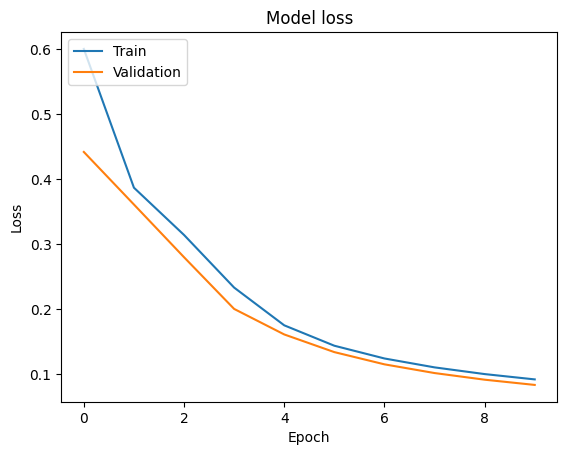

In [23]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

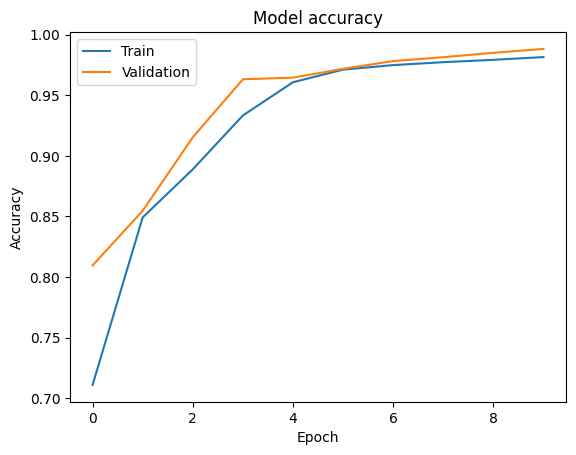

In [24]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()